# SIMP Rule Comment Analysis
This document analyzes all of the public comments on the SIMP Rule: https://www.regulations.gov/document/NOAA-NMFS-2022-0119-0001

The comments were obtained via the bulk download here: https://www.regulations.gov/bulkdownload

The code was generated with the help of Github's Copilot AI to automate some of the data processing and analysis

In [1]:
#import and initialize libraries
import pandas as pd
import re
import plotly
from difflib import SequenceMatcher
import plotly.express as px
!pip3 install python-docx
import docx
import os
import difflib
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

plt.style.use('ggplot')


You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


/var/folders/z4/2zbdnnm52zgfstckz8b80mv80000gn/T/ipykernel_1537/3706466374.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#Read in the public comments
df = pd.read_csv('04May2023SIMPComments.csv')
print(len(df))

2202


In [3]:
df.head()

,Document ID,Agency ID,Docket ID,Tracking Number,Document Type,Posted Date,Is Withdrawn?,Federal Register Number,FR Citation,Title,...,Government Agency,Government Agency Type,Comment,Category,Restrict Reason Type,Restrict Reason,Reason Withdrawn,Content Files,Attachment Files,"Display Properties (Name, Label, Tooltip)"
0,NOAA-NMFS-2022-0119-0001,NOAA,NOAA-NMFS-2022-0119,NaN,Proposed Rule,2022-12-28T05:00Z,False,2022-27741,NaN,Magnuson-Stevens Fishery Conservation and Mana...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,NaN,"pageCount, Page Count, Number of pages In the ..."
1,NOAA-NMFS-2022-0119-0002,NOAA,NOAA-NMFS-2022-0119,lcj-jtiv-eyjs,Public Submission,2023-01-20T05:00Z,False,NaN,NaN,"Comment from Brown, Julie",...,NaN,NaN,We should expand SIMP to ALL imported species,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ..."
2,NOAA-NMFS-2022-0119-0003,NOAA,NOAA-NMFS-2022-0119,lcr-zzpi-2xed,Public Submission,2023-01-20T05:00Z,False,NaN,NaN,"Comment from Wilson, Ann",...,NaN,NaN,"Ann M Wilson, NRES 520 UWSP\n\nAs a current gr...",NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ..."
3,NOAA-NMFS-2022-0119-0004,NOAA,NOAA-NMFS-2022-0119,lda-lwj0-6q7p,Public Submission,2023-02-02T05:00Z,False,NaN,NaN,Comment from Anonymous,...,NaN,NaN,I am excited to see the inclusion of eels on t...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ..."
4,NOAA-NMFS-2022-0119-0005,NOAA,NOAA-NMFS-2022-0119,ldk-z0yd-46w8,Public Submission,2023-02-02T05:00Z,False,NaN,NaN,"Comment from Weinmann, Marie",...,NaN,NaN,Dear NOAA Administrator Spinrad and NOAA Fishe...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ..."


In [4]:
# remove all non-letter characters from column names
df.columns = df.columns.str.replace('[^a-zA-Z]', '')
df.columns

/var/folders/z4/2zbdnnm52zgfstckz8b80mv80000gn/T/ipykernel_1537/3170508180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z]', '')


Index(['DocumentID', 'AgencyID', 'DocketID', 'TrackingNumber', 'DocumentType',
       'PostedDate', 'IsWithdrawn', 'FederalRegisterNumber', 'FRCitation',
       'Title', 'CommentStartDate', 'CommentDueDate', 'AllowLateComments',
       'CommentonDocumentID', 'EffectiveDate', 'ImplementationDate',
       'PostmarkDate', 'ReceivedDate', 'AuthorDate', 'RelatedRINs', 'Authors',
       'CFR', 'Abstract', 'LegacyID', 'Media', 'DocumentSubtype',
       'ExhibitLocation', 'ExhibitType', 'AdditionalField', 'AdditionalField',
       'Topics', 'DuplicateComments', 'OMBPRAApprovalNumber', 'PageCount',
       'PageLength', 'PaperWidth', 'SpecialInstructions', 'SourceCitation',
       'StartEndPage', 'Subject', 'FirstName', 'LastName', 'City',
       'StateProvince', 'ZipPostalCode', 'Country', 'OrganizationName',
       'SubmitterRepresentative', 'RepresentativesAddress',
       'RepresentativesCityStateZip', 'GovernmentAgency',
       'GovernmentAgencyType', 'Comment', 'Category', 'RestrictReasonT

In [5]:
# download all files from internet listed in ContentFiles column
import urllib.request
import os
for l in df['AttachmentFiles'].unique().tolist():
    #cast l to string
    l = str(l)
    if l != 'nan':
        for f in l.split(','):
            if not os.path.isfile(f):
                print(f)
                urllib.request.urlretrieve(f, ''.join(f.split('/')[-2:]).replace('^a-zA-Z0-9]', ''))

https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2015/attachment_1.png
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2115/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2117/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2130/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2131/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2132/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2133/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2138/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2144/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2146/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2148/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2149/attachment_1.pdf
https://downloads.regulations.gov/NOAA-NMFS-2022-0119-2149/attachment_1.docx
https://dow

In [6]:
df['AttachmentFiles'].apply(lambda x:   str(x).split('/')[-2] if '/' in str(x) else None ).unique().tolist()

[None,
 'NOAA-NMFS-2022-0119-2015',
 'NOAA-NMFS-2022-0119-2115',
 'NOAA-NMFS-2022-0119-2117',
 'NOAA-NMFS-2022-0119-2130',
 'NOAA-NMFS-2022-0119-2131',
 'NOAA-NMFS-2022-0119-2132',
 'NOAA-NMFS-2022-0119-2133',
 'NOAA-NMFS-2022-0119-2138',
 'NOAA-NMFS-2022-0119-2144',
 'NOAA-NMFS-2022-0119-2146',
 'NOAA-NMFS-2022-0119-2148',
 'NOAA-NMFS-2022-0119-2149',
 'NOAA-NMFS-2022-0119-2150',
 'NOAA-NMFS-2022-0119-2151',
 'NOAA-NMFS-2022-0119-2156',
 'NOAA-NMFS-2022-0119-2157',
 'NOAA-NMFS-2022-0119-2158',
 'NOAA-NMFS-2022-0119-2160',
 'NOAA-NMFS-2022-0119-2163',
 'NOAA-NMFS-2022-0119-2164',
 'NOAA-NMFS-2022-0119-2166',
 'NOAA-NMFS-2022-0119-2168',
 'NOAA-NMFS-2022-0119-2170',
 'NOAA-NMFS-2022-0119-2171',
 'NOAA-NMFS-2022-0119-2175',
 'NOAA-NMFS-2022-0119-2177',
 'NOAA-NMFS-2022-0119-2179',
 'NOAA-NMFS-2022-0119-2180',
 'NOAA-NMFS-2022-0119-2182',
 'NOAA-NMFS-2022-0119-2184',
 'NOAA-NMFS-2022-0119-2185',
 'NOAA-NMFS-2022-0119-2186',
 'NOAA-NMFS-2022-0119-2187',
 'NOAA-NMFS-2022-0119-2188',
 'NOAA-

In [7]:
#open files in this folder and extract text
import pdfplumber
import os
pdf_text_dict = {}
for f in os.listdir():
    if f.endswith('.pdf'):
        with pdfplumber.open(f) as pdf:
            # get filename of f
            filename = f.split('.')[0].replace('attachment_1', '')
            if len(pdf.pages) > 10:
                print(filename, len(pdf.pages))
            pdf_text_dict[filename] = '\n'.join([page.extract_text() for page in pdf.pages[0:20]])



NOAA-NMFS-2022-0119-2171 22
NOAA-NMFS-2022-0119-2202 15
NOAA-NMFS-2022-0119-2115 21
NOAA-NMFS-2022-0119-2166 12
NOAA-NMFS-2022-0119-2204 29
NOAA-NMFS-2022-0119-2163 26
NOAA-NMFS-2022-0119-2201 15
NOAA-NMFS-2022-0119-2185 13
NOAA-NMFS-2022-0119-2157attachment_2 18
NOAA-NMFS-2022-0119-2184 13
NOAA-NMFS-2022-0119-2200 15
NOAA-NMFS-2022-0119-2117 45
NOAA-NMFS-2022-0119-2150 323


In [8]:
# create dataframe from pdf_text_dict
pdf_text_df = pd.DataFrame.from_dict(pdf_text_dict, orient='index')
#join pdf_text_df to df on index 
df_with_pdf_data = df.set_index('DocumentID').join(pdf_text_df, how='left').reset_index()
df_with_pdf_data = df_with_pdf_data.rename(columns={0: 'pdf_text'})
df_with_pdf_data

,DocumentID,AgencyID,DocketID,TrackingNumber,DocumentType,PostedDate,IsWithdrawn,FederalRegisterNumber,FRCitation,Title,...,GovernmentAgencyType,Comment,Category,RestrictReasonType,RestrictReason,ReasonWithdrawn,ContentFiles,AttachmentFiles,DisplayPropertiesNameLabelTooltip,pdf_text
0,NOAA-NMFS-2022-0119-0001,NOAA,NOAA-NMFS-2022-0119,NaN,Proposed Rule,2022-12-28T05:00Z,False,2022-27741,NaN,Magnuson-Stevens Fishery Conservation and Mana...,...,NaN,NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,NaN,"pageCount, Page Count, Number of pages In the ...",NaN
1,NOAA-NMFS-2022-0119-0002,NOAA,NOAA-NMFS-2022-0119,lcj-jtiv-eyjs,Public Submission,2023-01-20T05:00Z,False,NaN,NaN,"Comment from Brown, Julie",...,NaN,We should expand SIMP to ALL imported species,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN
2,NOAA-NMFS-2022-0119-0003,NOAA,NOAA-NMFS-2022-0119,lcr-zzpi-2xed,Public Submission,2023-01-20T05:00Z,False,NaN,NaN,"Comment from Wilson, Ann",...,NaN,"Ann M Wilson, NRES 520 UWSP\n\nAs a current gr...",NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN
3,NOAA-NMFS-2022-0119-0004,NOAA,NOAA-NMFS-2022-0119,lda-lwj0-6q7p,Public Submission,2023-02-02T05:00Z,False,NaN,NaN,Comment from Anonymous,...,NaN,I am excited to see the inclusion of eels on t...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN
4,NOAA-NMFS-2022-0119-0005,NOAA,NOAA-NMFS-2022-0119,ldk-z0yd-46w8,Public Submission,2023-02-02T05:00Z,False,NaN,NaN,"Comment from Weinmann, Marie",...,NaN,Dear NOAA Administrator Spinrad and NOAA Fishe...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,NOAA-NMFS-2022-0119-2200,NOAA,NOAA-NMFS-2022-0119,lgz-w9zq-b8i3,Public Submission,2023-05-01T04:00Z,False,NaN,NaN,Comment from National Fisheries Institute,...,NaN,Please see attached comments from the National...,NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,"pageCount, Page Count, Number of pages In the ...","April 27, 2023\nMs. Janet Coit\nAssistant Admi..."
2198,NOAA-NMFS-2022-0119-2201,NOAA,NOAA-NMFS-2022-0119,lgz-sbpt-z168,Public Submission,2023-05-02T04:00Z,False,NaN,NaN,Comment from NRDC,...,NaN,See attached file(s),NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,"pageCount, Page Count, Number of pages In the ...","April 27, 2023\nRachael Confair\nTrade Monitor..."
2199,NOAA-NMFS-2022-0119-2202,NOAA,NOAA-NMFS-2022-0119,lgz-spv1-1q5g,Public Submission,2023-05-02T04:00Z,False,NaN,NaN,Comment from NRDC,...,NaN,See attached file(s),NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,"pageCount, Page Count, Number of pages In the ...","April 27, 2023\nRachael Confair\nTrade Monitor..."
2200,NOAA-NMFS-2022-0119-2203,NOAA,NOAA-NMFS-2022-0119,lgz-adhc-v1eh,Public Submission,2023-05-02T04:00Z,False,NaN,NaN,Comment from Southwind Foods LLC dba Great Ame...,...,NaN,My comments are in regards to the IFTP holder ...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN


In [9]:
#extract text from docx files

docx_text_dict = {}
for f in os.listdir():
    if f.endswith('.docx'):
        doc = docx.Document(f)
        # get filename of f
        filename = f.split('.')[0].replace('attachment_1', '')
        docx_text_dict[filename] = '\n'.join([p.text for p in doc.paragraphs])

In [10]:
#Create a single column with the unified text for each comment for analysis
def combine_comment_text(row):
    if str(row['Comment']) != 'nan' and str(row['pdf_text']) != 'nan':
        return row['Comment'] + ' ' + row['pdf_text']
    elif str(row['pdf_text']) != 'nan':
        return row['pdf_text']
    elif str(row['Comment']) != 'nan':
        return row['Comment']
    else:
        return 'UnknownText'
df_with_pdf_data['CombinedText'] = df_with_pdf_data.apply(combine_comment_text, axis=1)

In [35]:
print(f"Number of entries referencing eels: {len(df_with_pdf_data[df_with_pdf_data['CombinedText'].str.contains(' eel')])}")
df_with_pdf_data[df_with_pdf_data['CombinedText'].str.contains(' eel')]['DocumentID'].to_list()

Number of entries referencing eels: 11


['NOAA-NMFS-2022-0119-0003',
 'NOAA-NMFS-2022-0119-0004',
 'NOAA-NMFS-2022-0119-2134',
 'NOAA-NMFS-2022-0119-2136',
 'NOAA-NMFS-2022-0119-2137',
 'NOAA-NMFS-2022-0119-2150',
 'NOAA-NMFS-2022-0119-2156',
 'NOAA-NMFS-2022-0119-2163',
 'NOAA-NMFS-2022-0119-2166',
 'NOAA-NMFS-2022-0119-2195',
 'NOAA-NMFS-2022-0119-2200']

## Further Comment Analysis
Many of the documents were identical and appeared to be part of an advocacy campaign from the NRDC.

In [38]:
len(df_with_pdf_data['CombinedText'].unique())
# 218 unique documents at most

218

In [39]:
#count instances of CombinedText in df_with_pdf_data
df_with_pdf_data['CombinedText'].value_counts().head(10).reset_index()

#This shows 1979 are completely identical.

,index,CombinedText
0,Dear NOAA Administrator Spinrad and NOAA Fishe...,1979
1,Dear NOAA Administrator Spinrad and NOAA Fishe...,4
2,Dear NOAA Administrator Spinrad and NOAA Fishe...,2
3,"See attached file(s) April 27, 2023\nRachael C...",2
4,"See attached file(s) March 22, 2023\nMs. Racha...",2
5,Expanding the snapper species to all (currentl...,1
6,"To Whom it May Concern,\n \nI am in favor of e...",1
7,Please make good decisions.\n\nDear NOAA Admin...,1
8,Dear NOAA Administrator Spinrad and NOAA Fishe...,1
9,Dear NOAA Administrator Spinrad and NOAA Fishe...,1


In [40]:
# And 2044 are identical for the first 500 characters
df_with_pdf_data['CombinedText'].str[:500].value_counts().head(200).reset_index()

,index,CombinedText
0,Dear NOAA Administrator Spinrad and NOAA Fishe...,2044
1,Dear NOAA Administrator Spinrad and NOAA Fishe...,2
2,"See attached file(s) March 22, 2023\nMs. Racha...",2
3,Dear NOAA Administrator Spinrad and NOAA Fishe...,2
4,Dear NOAA Administrator Spinrad and NOAA Fishe...,2
...,...,...
149,To NOAA Administrator Spinrad and NOAA Fisheri...,1
150,Dear NOAA Administrator Spinrad and NOAA Fishe...,1
151,Dear NOAA Administrator Spinrad and NOAA Fishe...,1
152,Dear NOAA Administrator Spinrad and NOAA Fishe...,1


In [41]:
#Display the most common text
default_NOAA_Admin_Text = df_with_pdf_data['CombinedText'].value_counts().head(1).index[0]
print(default_NOAA_Admin_Text)

Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:

The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry. 

Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the 

In [42]:
combined_text_noaa_admin_list = df_with_pdf_data[df_with_pdf_data['CombinedText'].str.contains('NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit')]['CombinedText'].unique().tolist()
print(f"Distinct comments matching or likely derived from the form letter: {len(combined_text_noaa_admin_list)}")

Distinct comments matching or likely derived from the form letter: 137


In [43]:
#display differences in strings for the first 10 strings in combined_text_noaa_admin_list
deltas = sorted([round(SequenceMatcher(None, default_NOAA_Admin_Text, i).ratio(), 3) for i in combined_text_noaa_admin_list])


df = px.data.tips()
fig = px.histogram(deltas)
fig.show()
#So the vast majority of unique strings are still very very similar to the default text

# Display the text differences for all of the similar comments
This section is long and very detailed. CTRL+F for "END OF COMPARING RELATED COMMENTS" to skip to the next section

In [21]:
bigger_deltas = [i for i in combined_text_noaa_admin_list if SequenceMatcher(None, default_NOAA_Admin_Text, i).ratio() < 0.8]
smaller_deltas = [i for i in combined_text_noaa_admin_list if SequenceMatcher(None, default_NOAA_Admin_Text, i).ratio() < 0.95]

In [22]:
def render_diff(text1, text2):
    diff1 = difflib.HtmlDiff().make_file(text1, text2)
    diff_clean = re.sub('nowrap="nowrap"', '', diff1)
    diff_clean = re.sub('<table', '<table style="table-layout: fixed; width: 100%"', diff_clean)
    diff_clean = re.sub('td.diff_header {text-align:right}', 'td.diff_header {text-align:right; width:1%}', diff_clean)
    diff_clean = re.sub('.diff_next {background-color:#c0c0c0}', '.diff_next {background-color:#c0c0c0; width:1%}', diff_clean)
    diff_clean = re.sub('<td', '<td style="word-wrap: break-word"', diff_clean)
    return HTML(diff_clean)


In [23]:
for i in bigger_deltas:
    display(render_diff(default_NOAA_Admin_Text.split('\n'),i.split('\n'))) 

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"It seems clear that the United States must adopt an effective seafood traceability program to intercept the illegal seafood going into our markets. Illegal fishing is a MAJOR cause of unsustainable and environmentally destructive fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program are not sufficient to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is DEVASTATING our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The U.S. is one of the largest consumers of seafood. Apparently 80% of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"The U.S. government MUST fix these problems, and seafood traceability is an CRITICAL step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standard

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States needs a traceability program that works for seafood. Such a program could interrupt the flow of illegal seafood into our markets.
,4,,,4,
n,,,n,5,"Illegal fishing is killing the health of our oceans. It is driving unsustainable and environmentally destructive fishing practices around the globe. Moreover, it uses and abuse the human rights of its workers in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go nearly far enough to help end the U.S.'s role in allowing/encouraging human rights abuses and environmental destruction in the seafood industry."
,,,,6,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,7,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, and ignoring catch limits. To minimize labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,8,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,9,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,10,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,11,"The U.S. government has a responsibility to fix these problems. Seafood traceability is an essential step to stopping illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule fails to sufficiently address labor abuses in seafood supply chains."


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,Please. We need an effective seafood traceability program.The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,,
,6,,,5,
t,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",t,6,The U.S. government has a responsibility to fix these problems. Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help us consumers feel confident the seafood we buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.
,8,,,,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,,
,10,,,,
,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,,,


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets.
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe. However, the newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,Illegal fishing is destroying our oceans.
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,t,11,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported!"


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
t,,,t,2,
,,,,3,I concur with this message from NRDC and urge the NOAA to do what is necessary to curb illegal fishing and forced labor in the fishing industry.
,2,,,4,
,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",,5,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,6,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,7,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,8,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,9,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,10,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,11,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enf

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"The United States needs an effective **seafood traceability program to INTERCEPT the flow of illegal seafood into our markets. Illegal fishing is a TOP DRIVER of unsustainable and environmentally harmful fishing practices around the globe, as well as **associated human rights abuses in the seafood sector. ***The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. **Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the **overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"***The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and AS MUCH AS A THIRD of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"The U.S. government has a responsibility to fix these problems, and SEAFOOD TRACEABILITY is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive LOOPHOLES that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address LABOR ABUSES in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strong

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
t,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",t,3,"As someone who consumes a lot of seafood and tries to do so in an ethical manner, I am asking NOAA to develop and implement a strong and effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry. We must do better."
,4,,,4,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,8,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requir

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"As one of the largest consumers of seafood, approximately 80% of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the USA each year is illegal or unreported!"
,,,,8,"Our government must take corrective action, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in this industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only 50% of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. A ruling that fails to concretely address labor abuses in seafood supply chains and which includes no commitment to improve enforcement of traceability requirements has no ""real teeth."""
,8,,,9,
t,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",t,,
,10,,,,


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"The US needs an effective seafood traceability program to stop the flow of illegal seafood into our markets. Worldwide, Illegal fishing is a key reason for unsustainable, environmentally harmful fishing practices, and for associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program don't go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers cut costs by fishing with illegal gear, fishing in protected areas, and ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry relies heavily on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The U.S. is one of the largest consumers of seafood. Roughly 80% of the seafood sold in the U.S. is imported, and up to 1/3 of the wild-caught seafood sold in the US each year is illegal or unreported."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is essential to fight and end illegal fishing and human rights abuses in the seafood industry. Under NOAA Fisheries’ proposed rule, however, traceability requirements would apply to only half of seafood imports, leaving massive loopholes easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S.

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
t,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",t,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,,
,6,,,,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,,
,8,,,,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,,
,10,,,4,
,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,,5,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets!!
,,,,4,"Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector!! The newly proposed changes to the Seafood Import Monitoring Program do NOT go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry!!"
,4,,,5,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,6,Illegal fishing is destroying our oceans!!
,,,,7,"Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits! To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help!! Further, the overseas seafood processing industry is heavily reliant on forced labor!!"
,6,,,8,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,9,"The U.S. is one of the largest consumers of seafood! Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported!!"
,8,,,10,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,11,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry!! But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit!! The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes NO commitment to improve enforcement of traceability requirements!!"


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
t,2,,t,,
,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",,,
,4,,,,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,,
,6,,,2,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,3,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,4,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,5,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,6,
,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,,7,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States urgently needs an effective seafood traceability program to end the flow of illegal seafood into our markets.
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is a primary malefactor and protagonist of unsustainable and environmentally harmful fishing practices around the globe, as well as associated and unconscionable human rights abuses in the seafood sector."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s acquiesce with, tolerance of – and thus complicity with – the perpetuation of human rights abuses and environmental destruction in the seafood industry."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,Illegal fishing is degrading and progressively destroying all the world’s oceans.
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,t,11,"Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will seek to cut operational costs by fishing with illegal gear; fishing in protected areas; or ignoring catch limits."


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States urgently needs an effective seafood traceability program to end the flow of illegal seafood into our markets.
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is a primary malefactor and protagonist of unsustainable and environmentally harmful fishing practices around the globe, as well as associated and unconscionable human rights abuses in the seafood sector."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s acquiesce with, tolerance of – and thus complicity with – the perpetuation of human rights abuses and environmental destruction in the seafood industry."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,Illegal fishing is degrading and progressively destroying all the world’s oceans.
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,t,11,"Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will seek to cut operational costs by fishing with illegal gear; fishing in protected areas; or ignoring catch limits."


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"In the USA we desperately need an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is devastating our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The USA is one of the largest consumers of seafood. Approximately 80% of the seafood sold in the here is imported, and as much as 1/3 of the wild-caught seafood sold here each year is illegal or unreported."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"Our government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceabi

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets.
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,t,11,"To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."


f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
t,,,t,2,
,,,,3,"***Unscrupulous, amoral fishing boat operators on the high seas are ravaging both our ocean environment and the human rights of their effectively captive work force that is tantamount to a slave operation. The international legal system has yet to establish effective laws, enforcement, or deterrents in the vast zone known as the ""High Seas,"" and in this legal limbo, atrocities occur that would never be tolerated in American waters. The fishing operators fly flags of convenience, hop from port to port like pirates of old, and unload their ill-gotten loot into opaque, untraceable seafood supply chains that are typically happy to not inquire too energetically into the provenance of their curiously inexpensive product."
,,,,4,
,,,,5,"This insidious web of the gray market fishing industry places American importers, wholesalers, retailers, and consumers in the morally untenable position of funding crimes against our ocean ecosystem and against the human rights of people tricked or conscripted into medieval working conditions. The world's oceans are coming under increasing, crushing human demand for animal protein, and these rogue fishing operations that push further and deeper into the ungoverned 'High Seas' are both a product and self-reinforcing catalyst of this race to the bottom of both our planetary food chain and the dignity of the human workforce involved. I urge you to demand complete provenance for all seafood entering American markets, and to close access to any importer unable or unwilling to document legal operation at every step, to remove the American financial reward that is fueling this moral carnage.***"
,2,,,6,
,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",,7,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,8,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,9,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,10,
,7,"The U.S. is one of the largest consumers of seafood. Approxi

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"Eighty percent of the seafood sold in the United States is imported, making it one of the world’s most influential seafood markets. Nearly a third of the wild-caught seafood sold in the U.S. each year was caught through illegal or unreported practices."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Not only does illegal fishing destroy our oceans and deplete fisheries, but it often relies on forced labor and leads to rampant human rights abuses. Because most U.S. seafood is untraceable, U.S. consumers are unwittingly buying fish caught or processed through forced labor or human trafficking."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to stop the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,We need an effective seafood traceability program to intercept the flow of illegal seafood into our markets.
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standards for seafood traceability to intercept the flow of illegal seafood into the U.S. and help consumers feel confident the seafood they buy is legally caught and not a product of labor abuses. Thank you for helping to address these environmental and human rights crimes with the seriousness they deserve.,t,11,"Under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, It leaves loopholes that are easy to exploit. It also does not sufficiently address labor abuses in seafood supply chains."


n,,,n,1,"See attached file(s) Tuesday, March 28, 2023"
,,,,2,Rachael Confair
,,,,3,"Office of International Affairs, Trade, and Commerce"
,,,,4,National Marine Fisheries Service
,,,,5,1315 East-West Highway (F/IS5)
,,,,6,"Silver Spring, MD 20910"
,,,,7,Subject: End Illegal Fishing and Forced Labor -- Magnuson-Stevens Fishery
,,,,8,Conservation and Management Act: Seafood Import Monitoring Program (Document ID:
,,,,9,NOAA-NMFS-2022-0119-0001)
,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,,10,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
t,2,,t,11,The United States needs an effective seafood traceability program to intercept the flow


n,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,n,1,"Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit,"
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"The fight to stop unregulated, Illegal, and unreported fishing is extremely important. This catch not only hurts the environment, but hurts businesses and individuals in the US and abroad."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"However there are few things which need to be addressed in the current system, as well as what has been proposed."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,1. changes to the permit holder regulations
,,,,8,"- With current regulations, when the CBP Importer of Record is a foreign based entity (in Delivery Duty Paid [DDP] transactions), the NOAA IFT Permit holder is most often a US Company, because NOAA does not allow a foreign entity to hold an IFT Permit. If the proposal passes it will disallow all DDP imports which include any SIMP species. Now... US based Importers of Record will be responsible as the CBP Importer of Record for all these imports, including DDP imports of shrimp which carry hefty Anti-Dumping Duties (ADD). If a US based importer begins importing DDP product it will be required they provide Letters of Credit for a continuous bond with customs, which total millions of dollars in LCs at their bank. The other option would be that foreign based entities make very costly capital investments to open up their own US offices with staff and logistics departments. With this proposal we are opening up a can of economic worms, in already difficult financial times globally."
,8,,,9,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,10,"2. If a unified document is required (which I believe it should be), it absolutely needs to be 100% digitally readable, so it can be easily uploaded in the ACE system, with out further modification."
,10,,,11,


In [24]:
for i in smaller_deltas[0:4]:
    display(render_diff(default_NOAA_Admin_Text.split('\n'),i.split('\n'))) 

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"It seems clear that the United States must adopt an effective seafood traceability program to intercept the illegal seafood going into our markets. Illegal fishing is a MAJOR cause of unsustainable and environmentally destructive fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program are not sufficient to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,4,
n,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",n,5,"Illegal fishing is DEVASTATING our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,6,
n,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",n,7,"The U.S. is one of the largest consumers of seafood. Apparently 80% of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,8,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,9,"The U.S. government MUST fix these problems, and seafood traceability is an CRITICAL step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements."
,10,,,10,
t,11,Please revise the Seafood Import Monitoring Program proposed rule to adopt the strongest possible standard

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe. Furthermore, illegal fishing perpetrates human rights abuses of workers in the import seafood sector."
,,,,4,
,,,,5,The newly proposed changes to the Seafood Import Monitoring Program lack sufficient strength to stop the damage. The changes are insufficient to give the U.S. a powerful tool to in curtailing the destruction of ocean habitat and abuses of human rights perpetrated by illegal fishers.
,4,,,6,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,7,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,8,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,9,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,10,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,11,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability require

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
t,,,t,2,
,,,,3,"Considering our threats to ocean systems stability and marine species sustainability, and the need to address the outsized human footprint on our ocean ecosystems, it is time to address all issues of fishing with the most robust rules possible. Please enact the strictest and loophole-free monitoring and traceability rules to counter the damage we are doing to our ocean life."
,2,,,4,
,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",,5,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry."
,4,,,6,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,7,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,8,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,9,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,10,
,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",,11,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply t

f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:,f,1,Dear NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit:
,2,,,2,
n,3,"The United States needs an effective seafood traceability program to intercept the flow of illegal seafood into our markets. Illegal fishing is a top driver of unsustainable and environmentally harmful fishing practices around the globe, as well as associated human rights abuses in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go far enough to help end the U.S.'s role in perpetuating human rights abuses and environmental destruction in the seafood industry.",n,3,The United States needs a traceability program that works for seafood. Such a program could interrupt the flow of illegal seafood into our markets.
,4,,,4,
n,,,n,5,"Illegal fishing is killing the health of our oceans. It is driving unsustainable and environmentally destructive fishing practices around the globe. Moreover, it uses and abuse the human rights of its workers in the seafood sector. The newly proposed changes to the Seafood Import Monitoring Program do not go nearly far enough to help end the U.S.'s role in allowing/encouraging human rights abuses and environmental destruction in the seafood industry."
,,,,6,
,5,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, or ignoring catch limits. To save on labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor.",,7,"Illegal fishing is destroying our oceans. Years of overfishing in nearshore waters have forced boats to go into deeper waters, which makes fishing more expensive. Some fishers will cut costs by fishing with illegal gear, fishing in protected areas, and ignoring catch limits. To minimize labor costs, some vessel owners rely on human traffickers, some even kidnapping or drugging workers to get them on the ship and cut off from help. Further, the overseas seafood processing industry is heavily reliant on forced labor."
,6,,,8,
,7,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported.",,9,"The U.S. is one of the largest consumers of seafood. Approximately eighty percent of the seafood sold in the U.S. is imported, and as much as a third of the wild-caught seafood sold in the United States each year is illegal or unreported."
,8,,,10,
n,9,"The U.S. government has a responsibility to fix these problems, and seafood traceability is an essential step in the fight to end illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule also fails to sufficiently address labor abuses in seafood supply chains, and it includes no commitment to improve enforcement of traceability requirements.",n,11,"The U.S. government has a responsibility to fix these problems. Seafood traceability is an essential step to stopping illegal fishing and human rights abuses in the seafood industry. But under NOAA Fisheries’ proposed rule, traceability requirements would apply to only half of seafood imports, leaving massive loopholes that are easy for bad actors to exploit. The proposed rule fails to sufficiently address labor abuses in seafood supply chains."


### END OF COMPARING RELATED COMMENTS

### When were the comments received?

/var/folders/z4/2zbdnnm52zgfstckz8b80mv80000gn/T/ipykernel_1537/18292103.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z4/2zbdnnm52zgfstckz8b80mv80000gn/T/ipykernel_1537/18292103.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='ReceivedDate'>

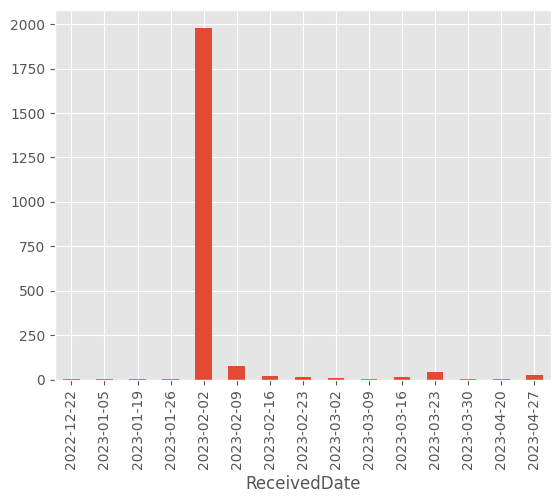

In [25]:
common_comments = df_with_pdf_data[df_with_pdf_data['CombinedText'].str.contains('NOAA Administrator Spinrad and NOAA Fisheries Assistant Administrator Coit')]
common_comments[['Authors', 'Title', 'StateProvince', 'Country', 'GovernmentAgency', 'ReceivedDate', 'PostedDate', 'AuthorDate', 'FirstName', 'LastName']]
# convert PostedDate to datetime
common_comments['PostedDate'] = pd.to_datetime(common_comments['PostedDate'])
common_comments['ReceivedDate'] = pd.to_datetime(common_comments['ReceivedDate'])
#bar chart of ReceivedDate rounded to nearest week
df_with_pdf_data['PostedDate'] = pd.to_datetime(df_with_pdf_data['PostedDate'])
df_with_pdf_data['ReceivedDate'] = pd.to_datetime(df_with_pdf_data['ReceivedDate'])
df_with_pdf_data['ReceivedDate'].groupby(df_with_pdf_data["ReceivedDate"].dt.floor('7D').dt.date).count().plot(kind='bar')

## Comment Posting Timeliness

<AxesSubplot:>

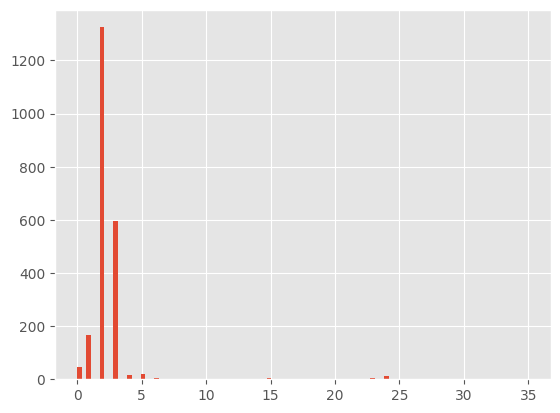

In [26]:
# convert PostedDate to datetime
df_with_pdf_data['PostedDate'] = pd.to_datetime(df_with_pdf_data['PostedDate'])
df_with_pdf_data['ReceivedDate'] = pd.to_datetime(df_with_pdf_data['ReceivedDate'])
# difference in dates between ReceivedDate and PostedDate
df_with_pdf_data['ReceivedToPostedDelta'] = (df_with_pdf_data['PostedDate'] - df_with_pdf_data['ReceivedDate']).dt.days
#convert timedelta to number of days and plot histogram
(df_with_pdf_data['PostedDate'] - df_with_pdf_data['ReceivedDate']).dt.days.hist(bins=100)

In [27]:
len(df_with_pdf_data[df_with_pdf_data['ReceivedToPostedDelta'] < 5]) / len(df_with_pdf_data)

0.9763851044504995

#### 97.6% of comments are posted within 5 days of being received

### The Remainder of Comments

In [28]:
unique_entries = df_with_pdf_data[~df_with_pdf_data['CombinedText'].str.contains('NOAA Administrator Spinrad')]
print(f'Unique comments: {len(unique_entries)}')
unique_entries.head(10)


Unique comments: 81


,DocumentID,AgencyID,DocketID,TrackingNumber,DocumentType,PostedDate,IsWithdrawn,FederalRegisterNumber,FRCitation,Title,...,Category,RestrictReasonType,RestrictReason,ReasonWithdrawn,ContentFiles,AttachmentFiles,DisplayPropertiesNameLabelTooltip,pdf_text,CombinedText,ReceivedToPostedDelta
0,NOAA-NMFS-2022-0119-0001,NOAA,NOAA-NMFS-2022-0119,NaN,Proposed Rule,2022-12-28 05:00:00+00:00,False,2022-27741,NaN,Magnuson-Stevens Fishery Conservation and Mana...,...,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,UnknownText,0
1,NOAA-NMFS-2022-0119-0002,NOAA,NOAA-NMFS-2022-0119,lcj-jtiv-eyjs,Public Submission,2023-01-20 05:00:00+00:00,False,NaN,NaN,"Comment from Brown, Julie",...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,We should expand SIMP to ALL imported species,15
2,NOAA-NMFS-2022-0119-0003,NOAA,NOAA-NMFS-2022-0119,lcr-zzpi-2xed,Public Submission,2023-01-20 05:00:00+00:00,False,NaN,NaN,"Comment from Wilson, Ann",...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,"Ann M Wilson, NRES 520 UWSP\n\nAs a current gr...",9
3,NOAA-NMFS-2022-0119-0004,NOAA,NOAA-NMFS-2022-0119,lda-lwj0-6q7p,Public Submission,2023-02-02 05:00:00+00:00,False,NaN,NaN,Comment from Anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,I am excited to see the inclusion of eels on t...,9
1893,NOAA-NMFS-2022-0119-1894,NOAA,NOAA-NMFS-2022-0119,ldt-rwo0-kgd0,Public Submission,2023-02-08 05:00:00+00:00,False,NaN,NaN,Comment from Anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,I think this is a good idea to combat illegal/...,1
1975,NOAA-NMFS-2022-0119-1976,NOAA,NOAA-NMFS-2022-0119,ldw-3hz6-3pz9,Public Submission,2023-02-08 05:00:00+00:00,False,NaN,NaN,Comment from Anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,Something ive learned about this regulation pr...,0
2001,NOAA-NMFS-2022-0119-2002,NOAA,NOAA-NMFS-2022-0119,ldx-9lru-1nql,Public Submission,2023-02-09 05:00:00+00:00,False,NaN,NaN,"Comment from Farpour, Samantha",...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,Given the prevalence and far-reaching conseque...,0
2003,NOAA-NMFS-2022-0119-2004,NOAA,NOAA-NMFS-2022-0119,ldx-hzpm-i62a,Public Submission,2023-02-09 05:00:00+00:00,False,NaN,NaN,Comment from Sea Port Products,...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,1.Please acknowledge the generalized growing p...,0
2014,NOAA-NMFS-2022-0119-2015,NOAA,NOAA-NMFS-2022-0119,ldy-yw1b-j304,Public Submission,2023-02-13 05:00:00+00:00,False,NaN,NaN,Comment from New York Customs Brokers Inc.,...,NaN,NaN,NaN,NaN,NaN,https://downloads.regulations.gov/NOAA-NMFS-20...,"pageCount, Page Count, Number of pages In the ...",NaN,As a customs broker who works with both suppli...,3
2030,NOAA-NMFS-2022-0119-2031,NOAA,NOAA-NMFS-2022-0119,le0-s2co-rczm,Public Submission,2023-02-13 05:00:00+00:00,False,NaN,NaN,Comment from Anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,"pageCount, Page Count, Number of pages In the ...",NaN,I believe this is a good start in protecting o...,2


<AxesSubplot:xlabel='ReceivedDate'>

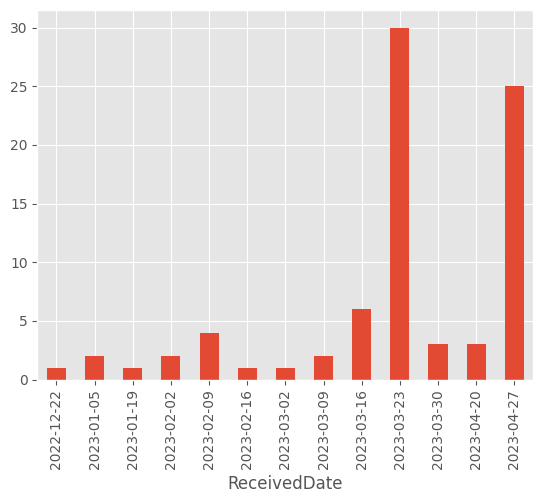

In [29]:
unique_entries['ReceivedDate'].groupby(unique_entries["ReceivedDate"].dt.floor('7D').dt.date).count().plot(kind='bar')

There were meaningful surges in comments at the initial end of the comment period(before the extension) and then at the true end of the comment period(after the extension).

In [30]:
', '.join(unique_entries['DocumentID'].to_list())

'NOAA-NMFS-2022-0119-0001, NOAA-NMFS-2022-0119-0002, NOAA-NMFS-2022-0119-0003, NOAA-NMFS-2022-0119-0004, NOAA-NMFS-2022-0119-1894, NOAA-NMFS-2022-0119-1976, NOAA-NMFS-2022-0119-2002, NOAA-NMFS-2022-0119-2004, NOAA-NMFS-2022-0119-2015, NOAA-NMFS-2022-0119-2031, NOAA-NMFS-2022-0119-2070, NOAA-NMFS-2022-0119-2112, NOAA-NMFS-2022-0119-2115, NOAA-NMFS-2022-0119-2117, NOAA-NMFS-2022-0119-2121, NOAA-NMFS-2022-0119-2125, NOAA-NMFS-2022-0119-2130, NOAA-NMFS-2022-0119-2131, NOAA-NMFS-2022-0119-2132, NOAA-NMFS-2022-0119-2133, NOAA-NMFS-2022-0119-2134, NOAA-NMFS-2022-0119-2135, NOAA-NMFS-2022-0119-2136, NOAA-NMFS-2022-0119-2137, NOAA-NMFS-2022-0119-2138, NOAA-NMFS-2022-0119-2139, NOAA-NMFS-2022-0119-2144, NOAA-NMFS-2022-0119-2145, NOAA-NMFS-2022-0119-2146, NOAA-NMFS-2022-0119-2147, NOAA-NMFS-2022-0119-2148, NOAA-NMFS-2022-0119-2149, NOAA-NMFS-2022-0119-2150, NOAA-NMFS-2022-0119-2151, NOAA-NMFS-2022-0119-2153, NOAA-NMFS-2022-0119-2157, NOAA-NMFS-2022-0119-2158, NOAA-NMFS-2022-0119-2159, NOAA-NMFS-2

There were many comments on SIMP but relatively few with distinct input, much less actionable changes to the proposed rule. Eel inclusion in SIMP was one of the most common themes